# The Sparks Foundation
# Data Science & Business Analytics intern (May-2022)
# Aurthor: Kishori Shinde
# Task 1 : Prediction using Supervised ML

In [2]:
# Importing all required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
# Reading the data

data='http://bit.ly/w-data'
df=pd.read_csv(data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

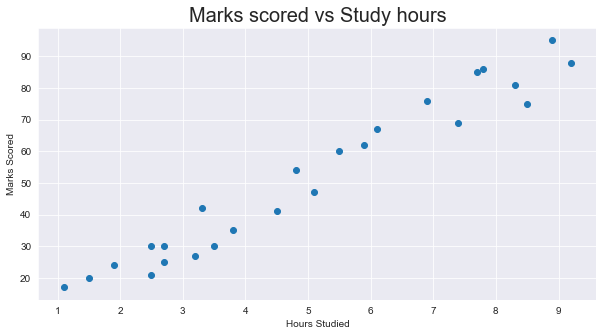

In [7]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('Marks scored vs Study hours',size=20)
plt.xlabel('Hours Studied',size=10)
plt.ylabel('Marks Scored',size=10)

plt.show()

 from the above graph it looks like correlation between hours studied and marks scored exist.
lets plot regression line to confirm it

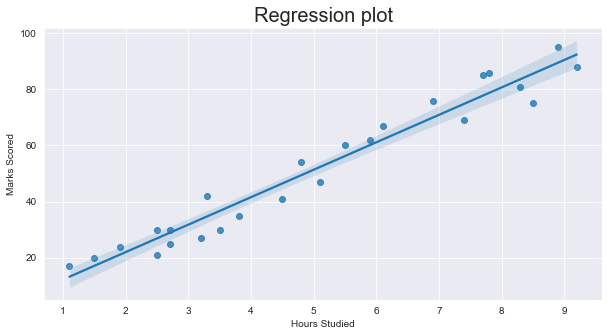

In [8]:
fig=plt.figure(figsize=(10,5))
sns.regplot(x='Hours',y='Scores',data=df)
plt.title('Regression plot',size=20)
plt.xlabel('Hours Studied',size=10)
plt.ylabel('Marks Scored',size=10)
plt.show()

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


It's confirmed that the variables are positively correlated.

# Training Model

In [10]:
# Splitting the data

x=df.drop(columns=['Scores'])
y=df['Scores']

In [11]:
# spliting it into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [12]:
# Training the model
linear=LinearRegression()
linear.fit(x_train,y_train)
predicitions=linear.predict(x_test)
print('Training completed')

Training completed


In [13]:
# Testing Module
predict=linear.predict(x_test)
prediction=pd.DataFrame({'Hours':x_test['Hours'], 'Predictied Marks':predict})
prediction

,Hours,Predictied Marks
2,3.2,34.376990
4,3.5,37.298311
5,1.5,17.822838
21,4.8,49.957369
23,6.9,70.406616
6,9.2,92.803410
1,5.1,52.878690


In [14]:
# Comparing it with actual marks
compare=pd.DataFrame({'Hours':x_test['Hours'], 'Actual Marks':y_test ,'Predictied Marks':predict})
compare

,Hours,Actual Marks,Predictied Marks
2,3.2,27,34.376990
4,3.5,30,37.298311
5,1.5,20,17.822838
21,4.8,54,49.957369
23,6.9,76,70.406616
6,9.2,88,92.803410
1,5.1,47,52.878690


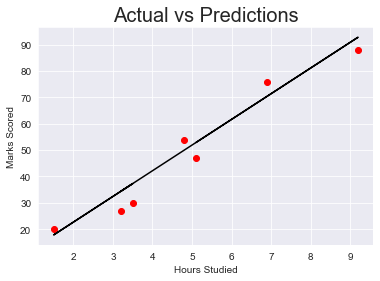

In [15]:
plt.scatter (x=x_test,y=y_test,color='red')
plt.plot(x_test,predict,color='Black')
plt.title('Actual vs Predictions',size=20)
plt.xlabel('Hours Studied',size=10)
plt.ylabel('Marks Scored',size=10)
plt.show()

# Evaluating Model


In [16]:
print('Mean error is:',mean_absolute_error(y_test,predict))

Mean error is: 5.310082644397798


Small value of mean absolute error state that the chances of error or incorrect forcasting through the model is very less

# Finding predicted score of student who have studied for 9.25 hours/day


In [17]:
hou=[9.25]
ans=linear.predict([hou])
print('Score is',ans[0])

Score is 93.29029654590585


According to regression model if student have studies for 9.25 hours/day then student likely to score 93.66 marks